## Lab 3: RADIO INTERFEROMETRY AT X BAND

In [3]:
#import timing
#import coord
import astropy.coordinates
#import dft
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.time import Time
import time
import scipy.signal
#import get_multimeter

### Week One
#### Rotation matrix for timing locations
Each group uses rotation matrices to calculate when objects of interest are up. 

#### Solar Fringes
Observe the Sun for a short time to confirm that it sees fringes. 

#### Observe a point source
Each group does a horizon-to-horizon observation of a point source, which requires writing an observing script to run automatically. 

#### Power spectra
Each person calculates Fourier power spectra of the Sun data and also the point-source data.

#### Compare to expected fringe frequencies
Calculate the range of expected local fringe frequencies (equation 14) and compares the observed spectra with these expectations. Be ready for show and tell!

### 8.1. Getting the Data
FIRST WEEK: Before doing the weak sources in the Table, do the Sun for a much shorter time, say an hour. This will give you confidence that the system works (or so we hope). There should be an easily-recognizable signal that you can look at visually, think about, and derive the
approximate declination with pencil and paper. Then later you can write software to do the same, and make sure you get the right answer. Also, during this first week, do the horizon-to-horizon track of one of the sources from the Table.

### 8.2. The Fringe

In [10]:
timing.julian_date??

In [4]:
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])


In [5]:
np.delete(arr, 1, 0)

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [35]:
volts = [np.load(f) for f in glob.glob('/home/cgould/ugradio/ugradio-scout-master/*volts.npy')]
times = [np.load(f) for f in glob.glob('/home/cgould/ugradio/ugradio-scout-master/*unitimes.npy')]

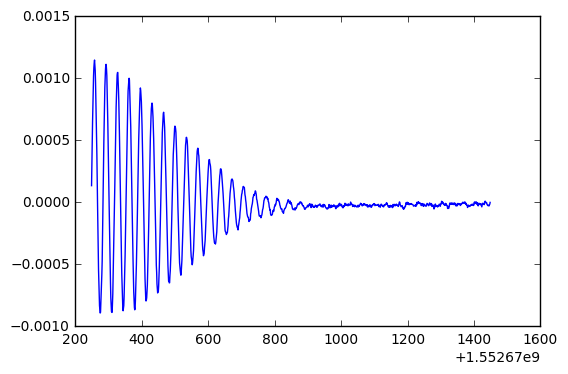

In [42]:
plt.plot(times[0], volts[0])
plt.show()

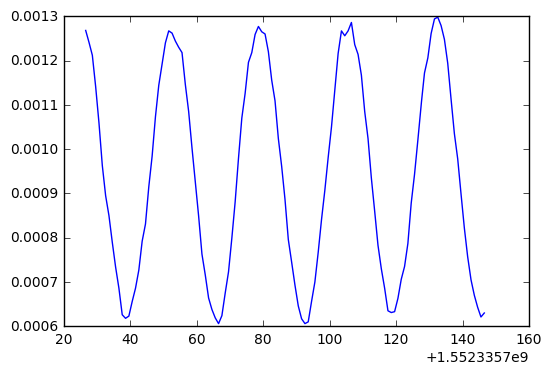

In [47]:
plt.plot(times[1], volts[1])
plt.show()

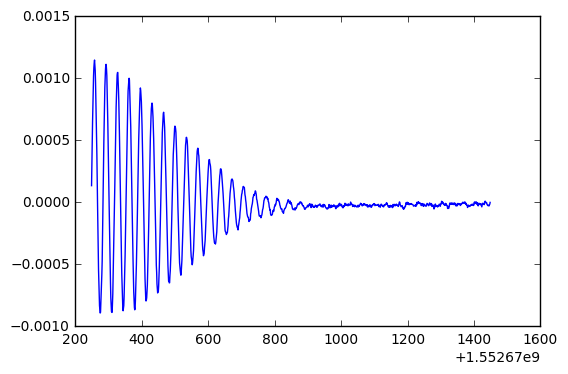

In [48]:
plt.plot(times[2], volts[2])
plt.show()

In [44]:
times[0][10]

1552670258.546824

# Getting Data from the Multimeter

HP_Multimeter():

    '''Client for reading from the HP 3478A Multimeter used to integrate
    baseband voltages in the UGRadio Interferometer.  Sends commands over
    the network to a microcontroller that translates commands to the GPIB
    bus on the back of the multimeter.'''

start_recording(self, dt, tries=10):

     '''Initiate continuous reading from multimeter every dt seconds.

read_voltage(self, bufsize=1024, return_time=False):
        '''Take a one-time reading from the multimeter.

        Parameters
        ----------
        bufsize     : integer, size of receiving buffer in bytes, default 1024
        return_time : bool, return unix time when read occurs, default False

        Returns
        -------
        volts[, time]
        volts       : float, voltage reading from multimeter
        time        : float, unix time when read occurs, if return_time=True'''

end_recording(self):

        '''Terminate continuous reading from multimeter and return recording.
        May take up to dt seconds (as set in start_recording call) to complete
        final read.

get_recording_status(self):
        '''Query current status of recording.

        Parameters
        ----------
        None

        Returns
        -------
        d : dict, status report on recording progress.'''

get_recording_data(self):
        '''Return all data that has been recorded so far.

        Parameters
        ----------
        None

        Returns
        -------
        volts : numpy array, voltages read during recording.
        times : numpy array, times corresponding to each voltage reading.'''

In [188]:
def takedata(dt, tries):

    '''Client for reading from the HP 3478A Multimeter used to integrate
    baseband voltages in the UGRadio Interferometer.  Sends commands over
    the network to a microcontroller that translates commands to the GPIB
    bus on the back of the multimeter.'''
    
    hpm = ugradio.hp_multi.HP_Multimeter() 
    
    '''Initiate continuous reading from multimeter every dt seconds.'''
    hpm.start_recording( dt, tries) 
    
    hpm.get_recording_status()
    
    '''locally wait for 120 seconds (have to exceed the total processing time)'''
    #time.sleep(1200)  
    sleep = dt * tries
    
    '''Terminate continuous reading from multimeter and return recording.
    May take up to dt seconds (as set in start_recording call) to complete
    final read.'''
    hpm.end_recording()
    
    data, times = hpm.get_recording_data() 
        
        
    
    return(data, times, sleep)

Exception in thread Thread-397:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



## Point to the location of the sun¶ 

In [171]:
def sun_alt():
    '''#locate the current position of sun in alt and az'''
    jd = ugradio.timing.julian_date()
    ra,dec = ugradio.coord.sunpos(jd)
    alt,az = ugradio.coord.get_altaz(ra,dec,jd,ugradio.nch.lat,ugradio.nch.lon,ugradio.nch.alt)
    return (alt,az)

In [219]:
ugradio.timing.julian_date??

In [163]:
ugradio.interf.Interferometer??

class Interferometer:

    '''Interface for controlling the two UGRadio interferometer telescopes together.'''
   
   def point(self, alt, az, wait=True, verbose=False):
        '''Point both antennas to the specified alt/az.'''
    
    def wait(self, verbose=False):
        '''Wait until both telescopes' slewing is complete

        Parameters
        ----------
        verbose : bool, be verbose, default=False

        Parameters
        ----------
        alt     : float degrees, altitude angle to point to
        az      : float degrees, azimuthal angle to point to
        wait    : bool, pause until both antennas have completed pointing, default=True
        verbose : bool, be verbose, default=False'''
   
   def get_pointing(self, verbose=False):
        '''Return the current telescope pointing

        Parameters
        ----------
        verbose : bool, be verbose, default=False

        Returns
        -------
        pointing: dict with {'ant_w':(alt,az), 'ant_e':(alt,az)} for the two antennas'''
    
    def stow(self, wait=True, verbose=False):
        '''Point both antennas to the stow position

        Parameters
        ----------
        wait    : bool, pause until antenna has completed pointing, default=True
        verbose : bool, be verbose, default=False


In [174]:
def point_interferometers(observing_object):
    ifm = ugradio.interf.Interferometer() 
    
    if observing_object == 'sun':
        '''#locate the current position of sun in alt and az'''
        alt,az = sun_alt() 

    '''Point both antennas to the specified alt/az.'''
    ifm.point(alt,az) 

    '''Return the current telescope pointing'''
    pointing = ifm.get_pointing()
    w_alt,w_az = pointing["ant_w"] 
    e_alt,e_az = pointing["ant_e"] 

    print("target:"+ str(alt)+","+str(az)) 
    print("west pointed :"+ str(w_alt)+","+str(w_az)) 
    print("east pointed :"+ str(e_alt)+","+str(e_az))

def stow_interferometers():
    '''Point both antennas to the stow position'''
    ifm.stow()
    print('Telescope stowed')


In [ ]:
def main():
    filename = 'suntest_3_16_1_18pm_'

    volts = []
    unixtime = []

    for i in range(500):
        point_interferometers('sun')
        data, times, sleep = takedata(1, 5)
        volts.append(data)
        unixtime.append(times)
        time.sleep(sleep)
    
    np.savez(filename+'_volts.npz', volts)
    np.savez(filename+'_time.npz', unixtime)

In [2]:
sun_mar10 = np.load('/home/cgould/Desktop/ugradio-scout-master/Sun+Data_Mar10.npz')
sun_mar14 = np.load('/home/cgould/Desktop/ugradio-scout-master/Sun+Data_Mar14.npz')
sun_mar18 = np.load('/home/cgould/Desktop/ugradio-scout-master/horizon(sun)_(mar18).npz')
sun_mar19 = np.load('/home/cgould/Desktop/ugradio-scout-master/horizon(sun )_(mar19).npz')
sun_mar29 = np.load('/home/cgould/Desktop/ugradio-scout-master/sun_mar29.npz')


moon_mar17 = np.load('/home/cgould/Desktop/ugradio-scout-master/horizon(moon)_(mar17).npz')
moon_mar18 = np.load('/home/cgould/Desktop/ugradio-scout-master/horizon(moon )_(mar18).npz')
moon_mar18_2 = np.load('/home/cgould/Desktop/ugradio-scout-master/horizon(moon_2 )_(mar18).npz')

cygnus_mar17 = np.load('/home/cgould/Desktop/ugradio-scout-master/horizon(Cygnus)_(mar17).npz')
crab_apr5 = np.load('/home/cgould/Desktop/ugradio-scout-master/crab_apr5.npz')

In [3]:
sun_10_volts = sun_mar10['volts']
sun_10_time = sun_mar10['unitimes']

sun_14_time = sun_mar14['unitimes']
sun_14_volts = sun_mar14['volts'] 

sun_18_volts = sun_mar18['volts']
sun_18_time = sun_mar18['unitimes']

sun_19_volts = sun_mar19['volts']
sun_19_time = sun_mar19['unitimes']

sun_29_volts = sun_mar29['volts']
sun_29_time = sun_mar29['unitimes']


moon_17_volts = moon_mar17['volts']
moon_17_time = moon_mar17['unitimes']

moon_18_volts = moon_mar18['volts']
moon_18_time = moon_mar18['unitimes']

moon_18_2_volts = moon_mar18_2['volts']
moon_18_2_time = moon_mar18_2['unitimes']

cygnus_17_volts = cygnus_mar17['volts']
cygnus_17_time = cygnus_mar17['unitimes']

crab_5_volts = crab_apr5['volts']
crab_5_time = crab_apr5['unitimes']

22
1801
('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 15:05:15.108>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-30 02:05:39.712>)


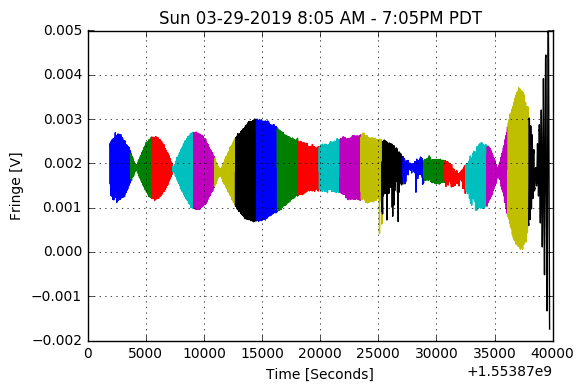

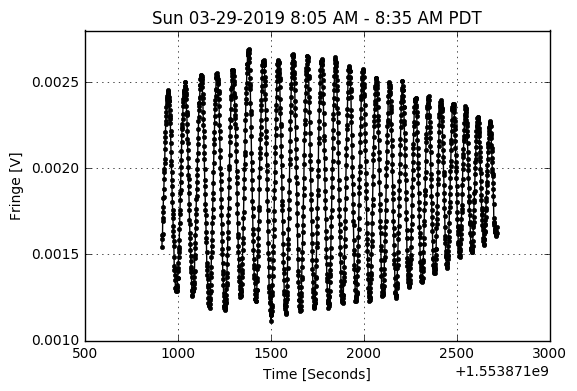

In [55]:
print(len(sun_29_volts))
print(len(sun_29_volts[0]))

start_date = Time(timing.julian_date(sun_29_time[0][0]), format = 'jd')
start_date.format = 'iso'
print('UTC start time = ', start_date)

end_date = Time(timing.julian_date(sun_29_time[21][-1]), format = 'jd')
end_date.format = 'iso'
print('UTC end time = ', end_date)

for i in range(len(sun_29_volts)-1):
    plt.plot(sun_29_time[i], sun_29_volts[i] , label = i*0.5 + 8)
plt.title('Sun 03-29-2019 8:05 AM - 7:05PM PDT')
plt.xlabel('Time [Seconds]')
plt.ylabel('Fringe [V]')
#plt.legend()
plt.grid()
plt.show()

plt.plot(sun_29_time[0], sun_29_volts[0], 'k.-')
plt.title('Sun 03-29-2019 8:05 AM - 8:35 AM PDT' )
plt.xlabel('Time [Seconds]')
plt.ylabel('Fringe [V]')
plt.grid()
plt.show()


('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 17:05:19.397>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 17:15:20.399>)
(46.88122265005069, 44.376523033946626)


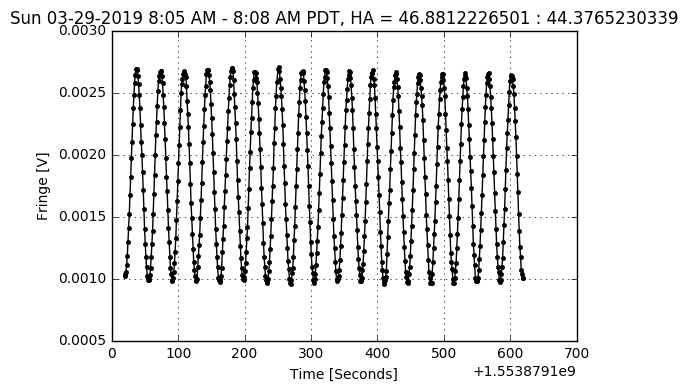

delay = 35.3084494111 seconds, 0.0283218327816Hz
avg hour angle = 45.6267895014, baseline = 50.0000016
283
317
calculated f = 0.0283218327816 Hz = 35.3084494111 seconds
measured f = 0.0283333333333 Hz = 35.2941176471 seconds
difference = 1.15005517195e-05 Hz  = 0.0143317640678 seconds


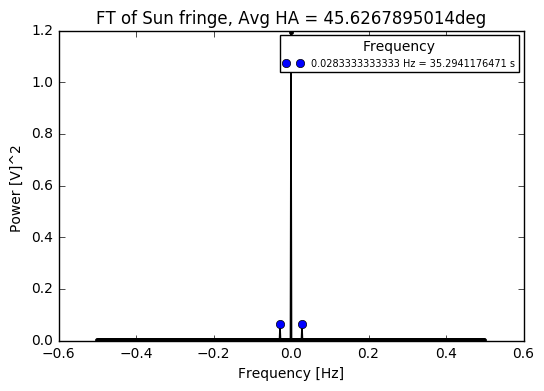

In [21]:
start = 0
end = 600
avg_time = abs(end-start)/2 + start

start_date = Time(timing.julian_date(sun_29_time[4][start]), format = 'jd')
start_date.format = 'iso'
print('UTC start time = ', start_date)

end_date = Time(timing.julian_date(sun_29_time[4][end]), format = 'jd')
end_date.format = 'iso'
print('UTC end time = ', end_date)

ra, dec = coord.sunpos(start_date)
lst = 180* timing.lst(start_date)/np.pi
start_ha = 360 + (ra-lst)

ra, dec = coord.sunpos(end_date)
lst = 180* timing.lst(end_date)/np.pi
end_ha = 360 +  (ra-lst)
print(start_ha, end_ha)


plt.plot(sun_29_time[4][start:end], sun_29_volts[4][start:end], 'k.-')
plt.title('Sun 03-29-2019 8:05 AM - 8:08 AM PDT, HA = ' + str(start_ha) + ' : ' + str(end_ha) )
plt.xlabel('Time [Seconds]')
plt.ylabel('Fringe [V]')
plt.grid()
plt.show()

jd = timing.julian_date(sun_29_time[4][avg_time])
ra, dec = coord.sunpos(jd)

lst = 180* timing.lst(jd)/np.pi
ha =  360 + (ra-lst)
lam = 2.8 #cm  #beam size
bx = 1524 #vary this ~50ft in cm
w = 2*np.pi/ 86164
f = bx/lam * np.cos(np.deg2rad(dec)) * np.sin(np.deg2rad(ha)) * w

print('delay = ' + str(1/f) + ' seconds, ' + str(f) + 'Hz')
print('avg hour angle = ' +str(ha) + ', baseline = ' + str(bx * 0.0328084))

#Fourier Transform

frequency, voltage = dft.dft(sun_29_volts[4][start:end], sun_29_time[4][start:end])
power = np.abs(voltage)**2


y_2 = np.sort(power)[-2]

for i in range(len(power)):
    if power[i] == y_2:
        x = i
        print(x)
        


measured_f = abs(frequency[x])

print('calculated f = '+ str(f) + ' Hz = ' +  str(1/f)+ ' seconds')
print('measured f = ' + str(measured_f) + ' Hz = ' + str(1/measured_f)+ ' seconds')
diff = abs(f - measured_f)
print('difference = ' + str(diff) + ' Hz  = ' + str(1/f - 1/measured_f)+ ' seconds')

plt.plot(frequency, power, 'k.-')
plt.plot(measured_f, y_2, 'bo', label = str(measured_f) + ' Hz = ' + str(1/measured_f) + ' s')
plt.plot(-measured_f, y_2, 'bo')
plt.ylabel('Power [V]^2 ')
plt.xlabel('Frequency [Hz]')
plt.title('FT of Sun fringe, Avg HA = '+ str(ha) + 'deg' )
plt.legend(prop={'size': 7}, title = 'Frequency')
plt.show()

1201


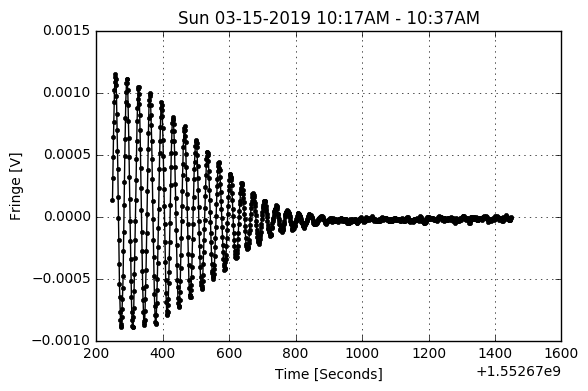

delay = 36.2901707282 seconds, 0.0275556708589Hz
avg hour angle = 44.0084825353, baseline = 50.0000016
('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-15 17:18:18.543>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-15 17:23:38.547>)
date = 03-15-2019 10:18AM - 10:20AM PDT 
(44.67527934563503, 43.341671134088074)


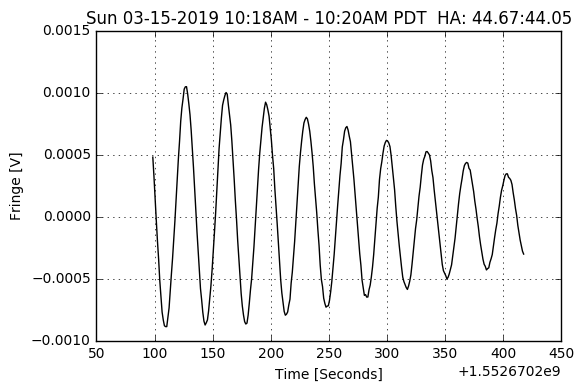

calculated f = 0.0275556708589 Hz = 36.2901707282 seconds
measured f = 0.028125 Hz = 35.5555555556 seconds
difference = 0.000569329141112 Hz  = 0.734615172676 seconds


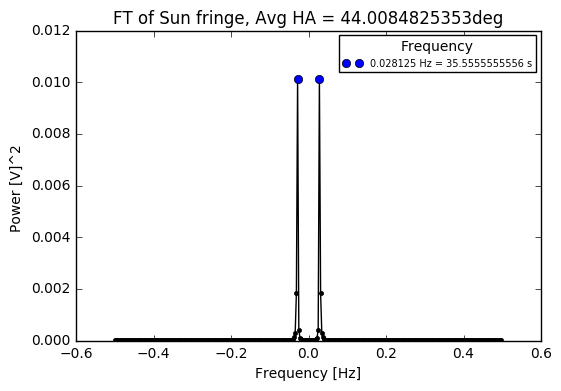

In [53]:
print(len(sun_10_volts))

start = 50
end = 370
avg_time = abs(end-start)/2 + start



plt.plot(sun_10_time, sun_10_volts, 'k.-')
plt.title('Sun 03-15-2019 10:17AM - 10:37AM' )
plt.xlabel('Time [Seconds]')
plt.ylabel('Fringe [V]')
plt.grid()
plt.show()

jd = timing.julian_date(sun_10_time[avg_time])
ra, dec = coord.sunpos(jd)

lst = 180* timing.lst(jd)/np.pi
ha = ra-lst
lam = 2.8 #cm  #10.6 / c
bx = 1524 #1421 #vary this ~50ft in cm
w = 2*np.pi/ 86164
f = bx/lam * np.cos(np.deg2rad(dec)) * np.sin(np.deg2rad(ha)) * w

print('delay = ' + str(1/f) + ' seconds, ' + str(f) + 'Hz')
print('avg hour angle = ' +str(ha) + ', baseline = ' + str(bx * 0.0328084))



start_date = Time(timing.julian_date(sun_10_time[start]), format = 'jd')
start_date.format = 'iso'
print('UTC start time = ', start_date)

end_date = Time(timing.julian_date(sun_10_time[end]), format = 'jd')
end_date.format = 'iso'
print('UTC end time = ', end_date)

start_time = '10:18AM '
end_time = '10:20AM PDT '
date = '03-15-2019 ' + start_time + '- '+  end_time
print('date = ' + date)


ra, dec = coord.sunpos(start_date)
lst = 180* timing.lst(start_date)/np.pi
start_ha = ra-lst

ra, dec = coord.sunpos(end_date)
lst = 180* timing.lst(end_date)/np.pi
end_ha = ra-lst
print(start_ha, end_ha)


plt.plot(sun_10_time[start:end], sun_10_volts[start:end], 'k-')
plt.title('Sun ' + date + ' HA: 44.67:44.05')
plt.xlabel('Time [Seconds]')
plt.ylabel('Fringe [V]')
plt.grid()
plt.show()


#Fourier Transform

frequency, voltage = dft.dft(sun_10_volts[start:end], sun_10_time[start:end])
power = np.abs(voltage)**2


measured_f = abs(frequency[np.argmax(power)])
print('calculated f = '+ str(f) + ' Hz = ' +  str(1/f)+ ' seconds')
print('measured f = ' + str(measured_f) + ' Hz = ' + str(1/measured_f)+ ' seconds')
diff = abs(f - measured_f)
print('difference = ' + str(diff) + ' Hz  = ' + str(1/f - 1/measured_f)+ ' seconds')

plt.plot(frequency, power, 'k.-')
plt.plot(measured_f, np.max(power), 'bo', label = str(measured_f) + ' Hz = ' + str(1/measured_f) + ' s')
plt.plot(-measured_f, np.max(power), 'bo')
plt.ylabel('Power [V]^2 ')
plt.xlabel('Frequency [Hz]')
plt.title('FT of Sun fringe, Avg HA = '+ str(ha) + 'deg' )
plt.legend(prop={'size': 7}, title = 'Frequency')
plt.show()

1


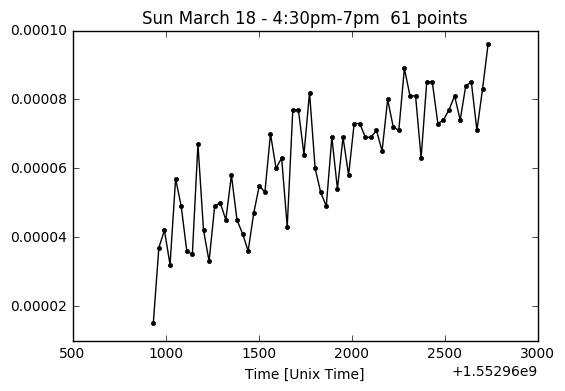

In [57]:
print(len(sun_18_time))
plt.plot(sun_18_time[0], sun_18_volts[0], 'k.-')
plt.title('Sun March 18 - 4:30pm-7pm  ' + str(len(sun_18_volts[0])) + ' points')
plt.xlabel('Time [Unix Time]')
plt.show()

61


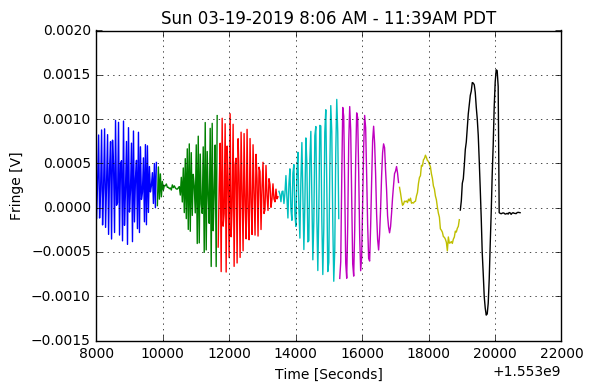

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-19 15:06:46.982>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-19 15:11:47.011>)
(77.27518187026118, 76.02480249752233)


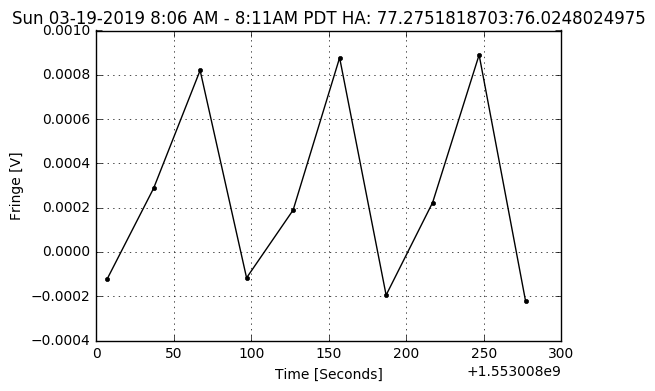

delay = 25.8965004831 seconds, 0.0386152561676Hz
avg hour angle = 76.6499303976, baseline = 50.0000016
calculated f = 0.0386152561676 Hz = 25.8965004831 seconds
measured f = 0.0 Hz = inf seconds
difference = 0.0386152561676 Hz  = -inf seconds


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:65: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:68: RuntimeWarning: divide by zero encountered in double_scalars


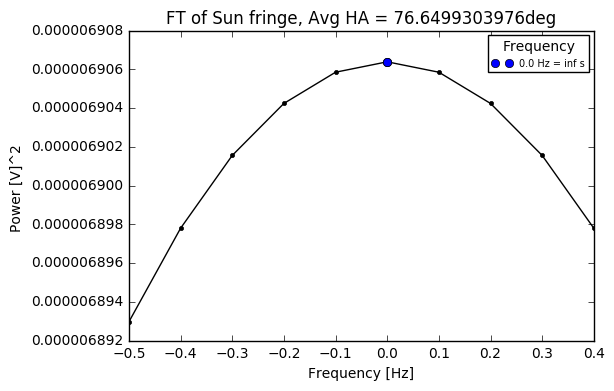

In [52]:
print(len(sun_19_volts[0]))

for i in range(len(sun_19_volts)):
    plt.plot(sun_19_time[i], sun_19_volts[i], label = i*0.5 + 8)
plt.title('Sun 03-19-2019 8:06 AM - 11:39AM PDT')
plt.xlabel('Time [Seconds]')
plt.ylabel('Fringe [V]')
#plt.legend()
plt.grid()
plt.show()


start = 0
end = 10
avg_time = abs(end-start)/2 + start

start_date = Time(timing.julian_date(sun_19_time[0][start]), format = 'jd')
start_date.format = 'iso'
print('UTC start time = ', start_date)

end_date = Time(timing.julian_date(sun_19_time[0][end]), format = 'jd')
end_date.format = 'iso'
print('UTC end time = ', end_date)

ra, dec = coord.sunpos(start_date)
lst = 180* timing.lst(start_date)/np.pi
start_ha = ra-lst

ra, dec = coord.sunpos(end_date)
lst = 180* timing.lst(end_date)/np.pi
end_ha = ra-lst
print(start_ha, end_ha)

plt.plot(sun_19_time[0][start:end], sun_19_volts[0][start:end], 'k.-')
plt.title('Sun 03-19-2019 8:06 AM - 8:11AM PDT HA: ' + str(start_ha) + ':' + str(end_ha))
plt.xlabel('Time [Seconds]')
plt.ylabel('Fringe [V]')
#plt.legend()
plt.grid()
plt.show()

jd = timing.julian_date(sun_19_time[0][avg_time])
ra, dec = coord.sunpos(jd)

lst = 180* timing.lst(jd)/np.pi
ha = ra-lst
lam = 2.8 #cm  #beam size
bx = 1524 #1421 #vary this ~50ft in cm
w = 2*np.pi/ 86164
f = bx/lam * np.cos(np.deg2rad(dec)) * np.sin(np.deg2rad(ha)) * w

print('delay = ' + str(1/f) + ' seconds, ' + str(f) + 'Hz')
print('avg hour angle = ' +str(ha) + ', baseline = ' + str(bx * 0.0328084))

#Fourier Transform

frequency, voltage = dft.dft(sun_19_volts[0][start:end], sun_19_time[0][start:end])
power = np.abs(voltage)**2


measured_f = abs(frequency[np.argmax(power)])
print('calculated f = '+ str(f) + ' Hz = ' +  str(1/f)+ ' seconds')
print('measured f = ' + str(measured_f) + ' Hz = ' + str(1/measured_f)+ ' seconds')
diff = f - measured_f
print('difference = ' + str(diff) + ' Hz  = ' + str(1/f - 1/measured_f)+ ' seconds')

plt.plot(frequency, power, 'k.-')
plt.plot(measured_f, np.max(power), 'bo', label = str(measured_f) + ' Hz = ' + str(1/measured_f) + ' s')
plt.plot(-measured_f, np.max(power), 'bo')
plt.ylabel('Power [V]^2 ')
plt.xlabel('Frequency [Hz]')
plt.title('FT of Sun fringe, Avg HA = '+ str(ha) + 'deg' )
plt.legend(prop={'size': 7}, title = 'Frequency')
plt.show()

In [74]:
#Calculate the fringe delay at a specific time

start = 100
end = 700

avg_time = (end-start)/2 + start
jd = timing.julian_date(moon_17_time[0][avg_time])
ra, dec = coord.moonpos(jd)

lst = 180* timing.lst(jd)/np.pi
ha = ra-lst
lam = 2.8 #cm  #beam size
bx = 1524 #1421 #vary this ~50ft in cm
w = 2*np.pi/ 86164


f = bx/lam * np.cos(np.deg2rad(dec)) * np.sin(np.deg2rad(ha)) * w
print('delay = ' + str(1/f) + ' seconds, ' + str(f) + 'Hz')
print('avg hour angle = ' +str(ha) + ', baseline = ' + str(bx * 0.0328084))


print('ra = ' + str(ra), 'dec = ' + str(dec), 'lst = ' + str(lst), 'ha = ' + str(ha))


start_date = Time(timing.julian_date(moon_17_time[0][start]), format = 'jd')
start_date.format = 'iso'
print('UTC start time = ', start_date)

end_date = Time(timing.julian_date(moon_17_time[0][end]), format = 'jd')
end_date.format = 'iso'
print('UTC end time = ', end_date)

start_time = '7:41PM '
end_time = '7:44PM PDT '
date = ' 03-17-2019 ' + start_time + '- '+  end_time
print('date = ' + date)


ra, dec = coord.moonpos(start_date)
lst = 180* timing.lst(start_date)/np.pi
start_ha = ra-lst

ra, dec = coord.moonpos(end_date)
lst = 180* timing.lst(end_date)/np.pi
end_ha = ra-lst
print(start_ha, end_ha)


delay = 38.3211851169 seconds, 0.0260952263598Hz
avg hour angle = 43.5834341077, baseline = 50.0000016
('ra = 139.136522201', 'dec = 17.5071322045', 'lst = 95.5530880929', 'ha = 43.5834341077')
('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-18 02:39:25.926>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-18 02:59:56.926>)
date =  03-17-2019 7:41PM - 7:44PM PDT 
(46.0781693474033, 41.09927786965483)


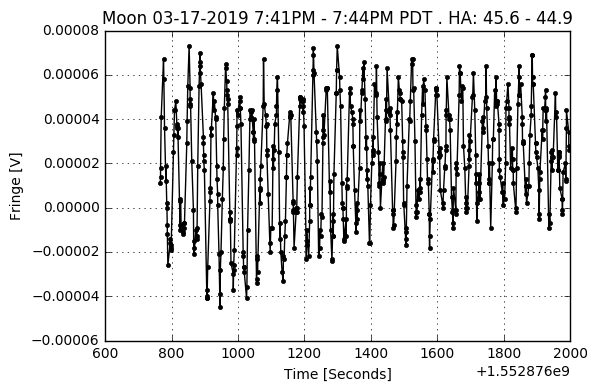

In [35]:
# Plot a few periods of data
plt.plot(moon_17_time[0][start:end], moon_17_volts[0][start:end], 'k.-')
plt.title('Moon' + date + '. HA: ' + '45.6 - 44.9')
plt.xlabel('Time [Seconds]')
plt.ylabel('Fringe [V]')
plt.grid()
#plt.xlim(200,240)
plt.show()

284
calculated f = 0.0260952263598 Hz = 38.3211851169 seconds
measured f = 0.0266666666667 Hz = 37.5 seconds
difference = 0.000571440306871 Hz  = 0.821185116856 seconds


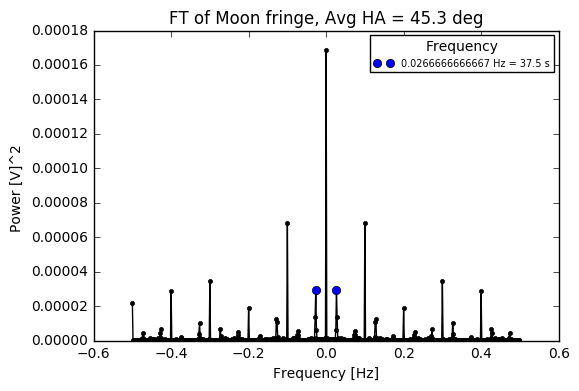

In [36]:
moon_time = moon_17_time[0][start:end]
moon_volts = moon_17_volts[0][start:end]


frequency, voltage = dft.dft(moon_volts, moon_time)
power = np.abs(voltage)**2


y_2 = np.sort(power)[-6]

for i in range(len(power)):
    if power[i] == y_2:
        x = i
        print(x)


measured_f = abs(frequency[x])

print('calculated f = '+ str(f) + ' Hz = ' +  str(1/f)+ ' seconds')
print('measured f = ' + str(measured_f) + ' Hz = ' + str(1/measured_f)+ ' seconds')
diff = abs(f - measured_f)
print('difference = ' + str(diff) + ' Hz  = ' + str(1/f - 1/measured_f)+ ' seconds')

plt.plot(frequency, power, 'k.-')
plt.plot(measured_f, y_2, 'bo', label = str(measured_f) + ' Hz = ' + str(1/measured_f) + ' s')
plt.plot(-measured_f, y_2, 'bo')
plt.ylabel('Power [V]^2 ')
plt.xlabel('Frequency [Hz]')
plt.title('FT of Moon fringe, Avg HA = 45.3 deg' )
plt.legend(prop={'size': 7}, title = 'Frequency')
plt.show()




20
1801


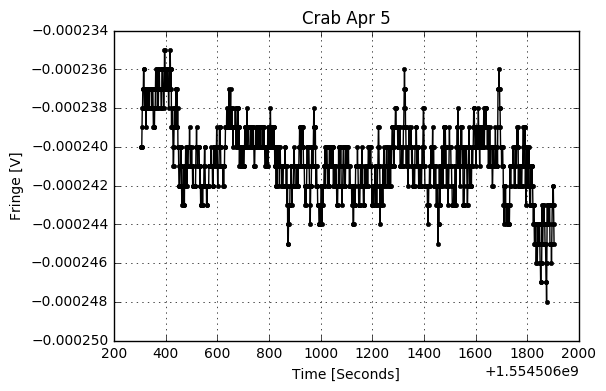

In [12]:
print(len(crab_5_volts))
print(len(crab_5_volts[0]))
plt.plot(crab_5_time[0][:1600], crab_5_volts[0][:1600], 'k.-')
plt.title('Crab Apr 5')
plt.xlabel('Time [Seconds]')
plt.ylabel('Fringe [V]')
plt.grid()
plt.show()

18
61


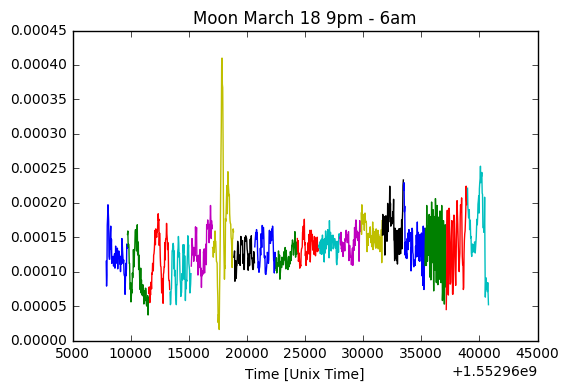

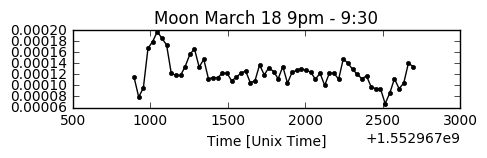

In [69]:
print(len(moon_18_2_volts))
print(len(moon_18_2_volts[0]))

for i in range(len(moon_18_2_volts)):

    plt.plot(moon_18_2_time[i], moon_18_2_volts[i], label = i*0.5+9)
plt.title('Moon March 18 9pm - 6am')
plt.xlabel('Time [Unix Time]')

plt.show()

plt.figure(figsize = (5, 1))
plt.plot(moon_18_2_time[0], moon_18_2_volts[0], 'k.-')
plt.title('Moon March 18 9pm - 9:30')
plt.xlabel('Time [Unix Time]')

plt.show()

In [80]:
import powerspectrum

In [129]:
hpm = ugradio.hp_multi.HP_Multimeter()

In [131]:
import time
hpm.start_recording(dt = 10)
time.sleep(30)
hpm.end_recording()
tempData, tempTime = hpm.get_recording_data()
print tempData

[ 0.000728  0.000734  0.000727  0.000727]


In [132]:
hpm.start_recording(dt = 10, tries = 2)
time.sleep(30)
hpm.end_recording()
tempData, tempTime = hpm.get_recording_data()
print tempData

[ 0.000722  0.000728  0.000728  0.000742]


('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 15:05:15.108>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 15:15:15.109>)
(76.90538088556588, 74.40485382665753)


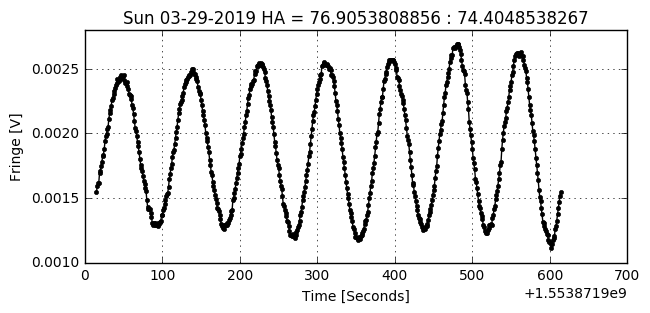

delay = 102.143042343 seconds, 0.00979019203914Hz
avg hour angle = 75.6551153424, baseline = 50.0000016
('ra = 7.69130867472', 'dec = 3.32026957177', 'lst = 292.036193332', 'ha = 75.6551153424')
293
calculated f = 0.00979019203914 Hz = 102.143042343 seconds
measured f = 0.0116666666667 Hz = 85.7142857143 seconds
difference = 0.00187647462753 Hz  = 16.4287566287 seconds


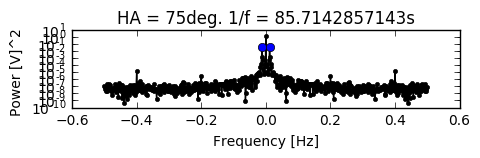

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 15:35:16.219>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 15:45:16.214>)
(69.39918102262595, 66.89867764452435)


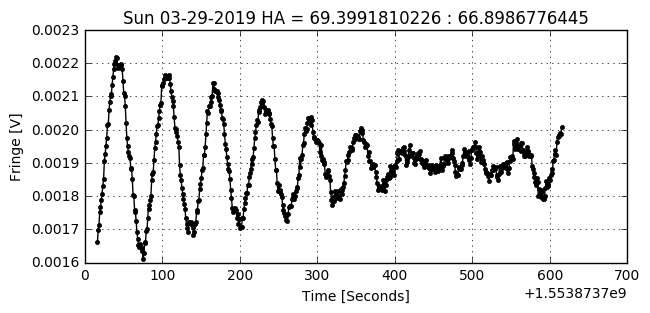

delay = 67.9937685639 seconds, 0.0147072301054Hz
avg hour angle = 68.1489215351, baseline = 50.0000016
('ra = 7.71028414904', 'dec = 3.32839305152', 'lst = 299.561362614', 'ha = 68.1489215351')
60
540
calculated f = 0.0147072301054 Hz = 67.9937685639 seconds
measured f = 0.0133333333333 Hz = 75.0 seconds
difference = 0.00137389677204 Hz  = -7.00623143615 seconds


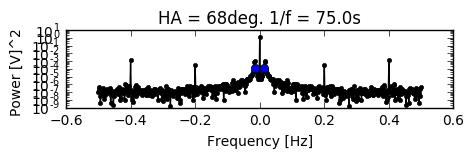

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 16:05:17.213>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 16:15:17.210>)
(61.893467361170906, 59.3929542971552)


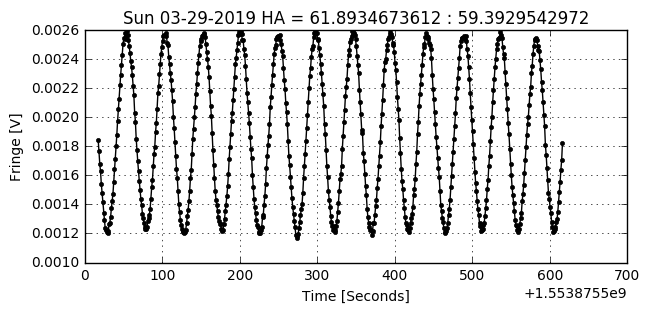

delay = 51.6213362949 seconds, 0.0193718348221Hz
avg hour angle = 60.6432169476, baseline = 50.0000016
('ra = 7.72925850113', 'dec = 3.33651555275', 'lst = 307.086041554', 'ha = 60.6432169476')
312
calculated f = 0.0193718348221 Hz = 51.6213362949 seconds
measured f = 0.02 Hz = 50.0 seconds
difference = 0.000628165177901 Hz  = 1.62133629486 seconds


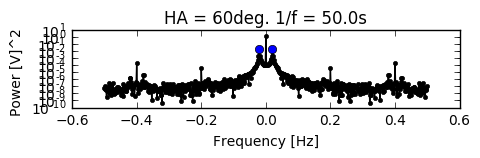

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 16:35:18.297>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 16:47:48.297>)
(54.3873783971988, 51.26172483638618)


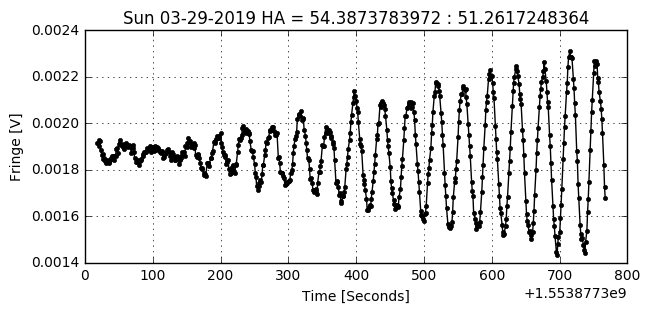

delay = 41.8817908463 seconds, 0.0238767249392Hz
avg hour angle = 52.8245515304, baseline = 50.0000016
('ra = 7.74902413785', 'dec = 3.34497625452', 'lst = 314.924472607', 'ha = 52.8245515304')
60
540
calculated f = 0.0238767249392 Hz = 41.8817908463 seconds
measured f = 0.025 Hz = 40.0 seconds
difference = 0.00112327506076 Hz  = 1.8817908463 seconds


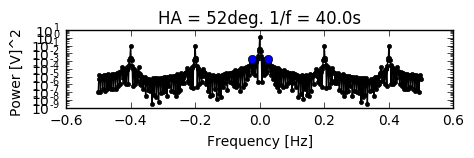

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 17:05:19.397>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 17:15:20.399>)
(46.88122265005069, 44.376523033946626)


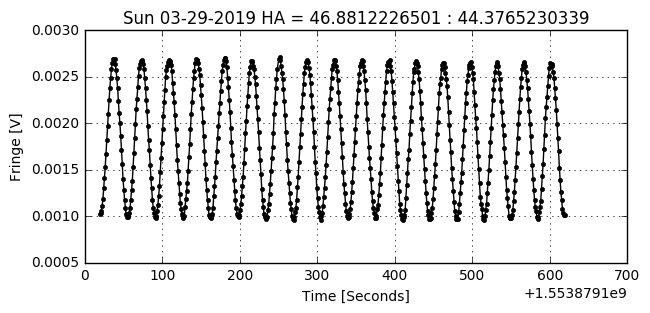

delay = 36.1883897038 seconds, 0.0276331720804Hz
avg hour angle = 45.6267895014, baseline = 50.0000016
('ra = 7.76722023797', 'dec = 3.3527646344', 'lst = 322.140430737', 'ha = 45.6267895014')
283
317
calculated f = 0.0276331720804 Hz = 36.1883897038 seconds
measured f = 0.0283333333333 Hz = 35.2941176471 seconds
difference = 0.000700161252902 Hz  = 0.894272056785 seconds


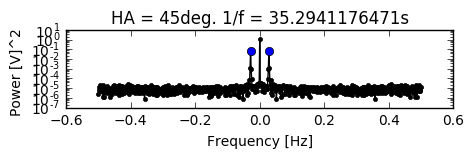

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 17:35:20.529>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 17:45:20.530>)
(39.374936907665585, 36.874408368867535)


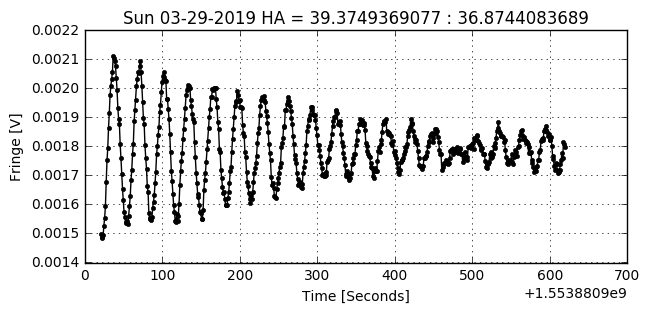

delay = 32.1708361527 seconds, 0.0310840537453Hz
avg hour angle = 38.1246706245, baseline = 50.0000016
('ra = 7.78618587301', 'dec = 3.36088190321', 'lst = 329.661515248', 'ha = 38.1246706245')
319
calculated f = 0.0310840537453 Hz = 32.1708361527 seconds
measured f = 0.0316666666667 Hz = 31.5789473684 seconds
difference = 0.000582612921378 Hz  = 0.591888784234 seconds


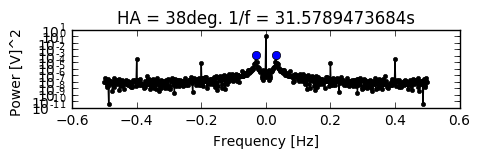

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 18:05:21.615>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 18:15:21.613>)
(31.868838576042776, 29.36832550325704)


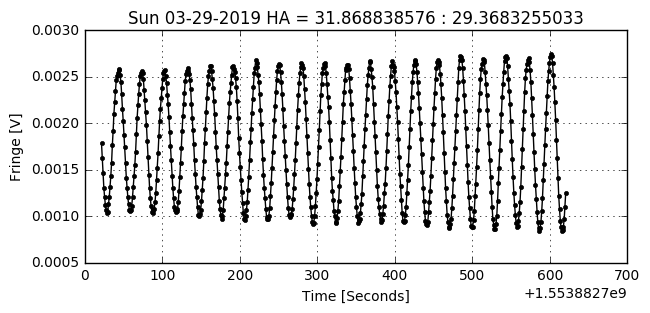

delay = 29.4082034674 seconds, 0.0340041172903Hz
avg hour angle = 30.6185874035, baseline = 50.0000016
('ra = 7.80516164734', 'dec = 3.36900300889', 'lst = 337.186574244', 'ha = 30.6185874035')
280
320
calculated f = 0.0340041172903 Hz = 29.4082034674 seconds
measured f = 0.0333333333333 Hz = 30.0 seconds
difference = 0.000670783956933 Hz  = -0.591796532644 seconds


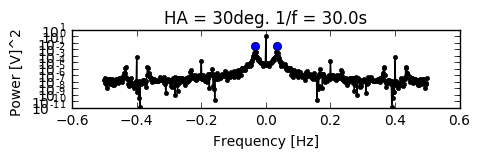

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 18:35:22.712>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 18:45:22.711>)
(24.36270062644229, 21.862181054722953)


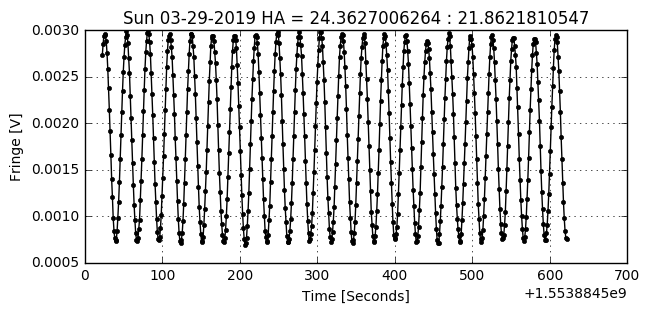

delay = 27.5168339627 seconds, 0.0363413901961Hz
avg hour angle = 23.1124427671, baseline = 50.0000016
('ra = 7.82413769493', 'dec = 3.37712372746', 'lst = 344.711694928', 'ha = 23.1124427671')
322
calculated f = 0.0363413901961 Hz = 27.5168339627 seconds
measured f = 0.0366666666667 Hz = 27.2727272727 seconds
difference = 0.000325276470561 Hz  = 0.244106689974 seconds


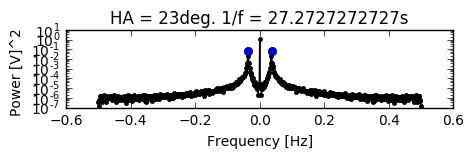

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 19:05:23.815>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 19:15:23.813>)
(16.85653144323487, 14.356016439248663)


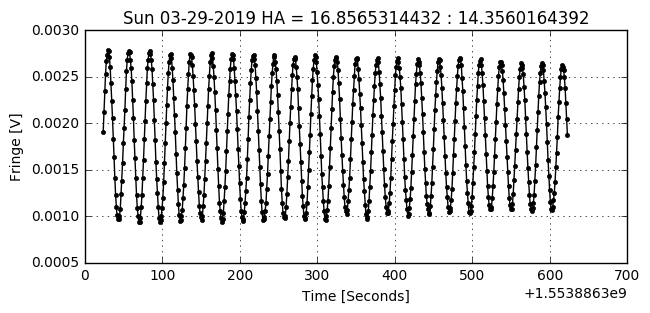

delay = 26.2772013696 seconds, 0.038055803049Hz
avg hour angle = 15.6062784667, baseline = 50.0000016
('ra = 7.84311391094', 'dec = 3.38524401286', 'lst = 352.236835444', 'ha = 15.6062784667')
277
323
calculated f = 0.038055803049 Hz = 26.2772013696 seconds
measured f = 0.0383333333333 Hz = 26.0869565217 seconds
difference = 0.000277530284342 Hz  = 0.190244847856 seconds


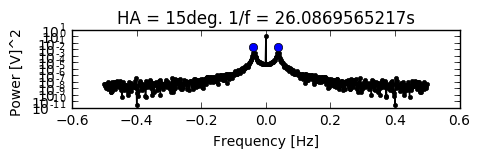

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 19:35:24.934>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 19:45:24.932>)
(9.350297827850397, 353.1502139495501)


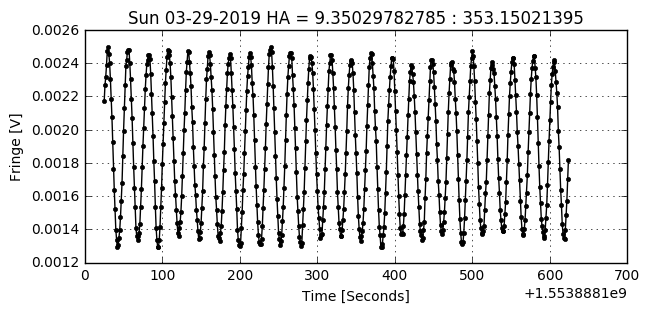

delay = 25.5636897514 seconds, 0.0391179837389Hz
avg hour angle = 8.1000475545, baseline = 50.0000016
('ra = 7.86209041474', 'dec = 3.39336391497', 'lst = 359.76204286', 'ha = 8.1000475545')
277
323
calculated f = 0.0391179837389 Hz = 25.5636897514 seconds
measured f = 0.0383333333333 Hz = 26.0869565217 seconds
difference = 0.000784650405559 Hz  = -0.523266770374 seconds


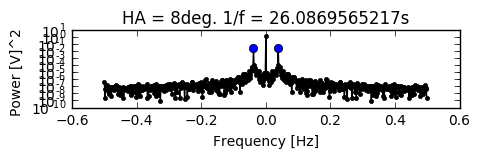

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 20:05:26.061>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 20:15:26.059>)
(358.15596634901766, 359.34351738743845)


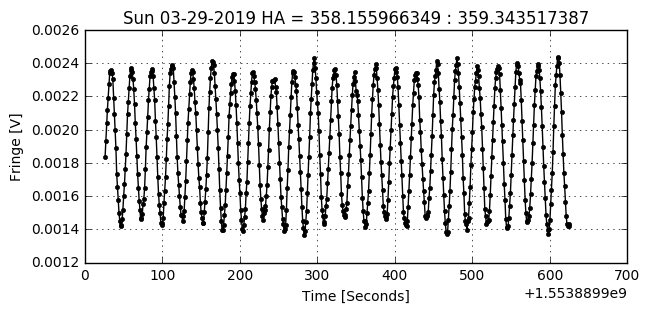

delay = 25.3102267088 seconds, 0.0395097211694Hz
avg hour angle = 0.593779038632, baseline = 50.0000016
('ra = 7.8810671337', 'dec = 3.40148340151', 'lst = 7.28728809507', 'ha = 0.593779038632')
277
323
calculated f = 0.0395097211694 Hz = 25.3102267088 seconds
measured f = 0.0383333333333 Hz = 26.0869565217 seconds
difference = 0.00117638783605 Hz  = -0.776729812904 seconds


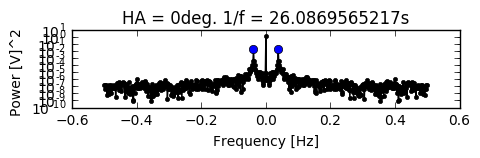

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 20:35:27.194>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 20:45:27.192>)
(354.3377415961105, 351.8372288949727)


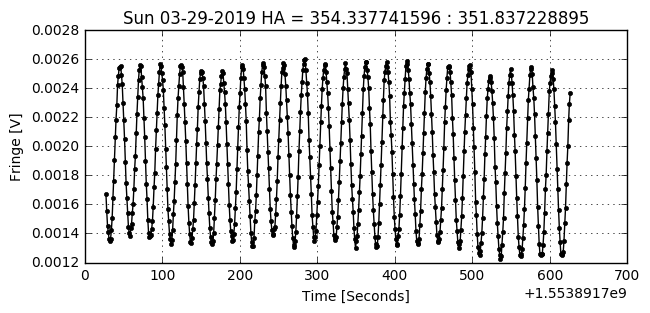

delay = 25.4943975508 seconds, 0.0392243040067Hz
avg hour angle = -6.91251048052, baseline = 50.0000016
('ra = 7.90004402655', 'dec = 3.40960245362', 'lst = 14.8125545071', 'ha = -6.91251048052')
277
323
calculated f = 0.0392243040067 Hz = 25.4943975508 seconds
measured f = 0.0383333333333 Hz = 26.0869565217 seconds
difference = 0.000890970673411 Hz  = -0.592558970974 seconds


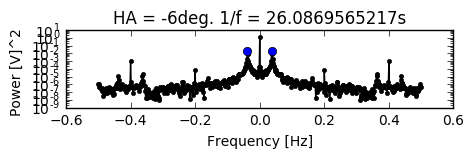

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 21:05:28.401>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 21:17:57.400>)
(346.83114382955995, 343.70965924694264)


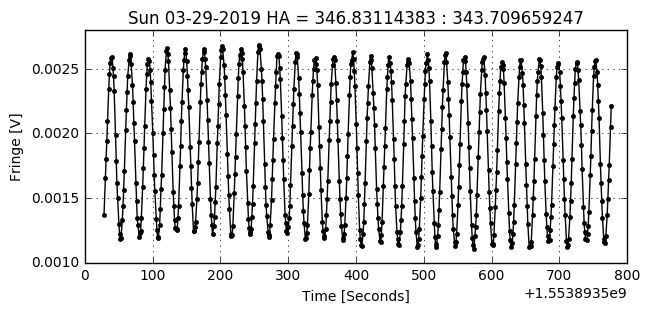

delay = 26.1690667186 seconds, 0.0382130555419Hz
avg hour angle = -14.7275040593, baseline = 50.0000016
('ra = 7.91980149319', 'dec = 3.41805492362', 'lst = 22.6473055525', 'ha = -14.7275040593')
60
540
calculated f = 0.0382130555419 Hz = 26.1690667186 seconds
measured f = 0.0366666666667 Hz = 27.2727272727 seconds
difference = 0.00154638887527 Hz  = -1.10366055409 seconds


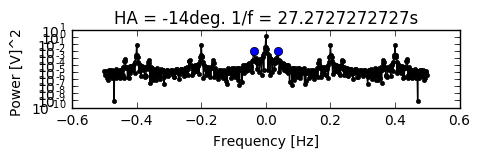

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 21:35:29.501>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 21:45:29.496>)
(339.3249895156188, 336.82448662277005)


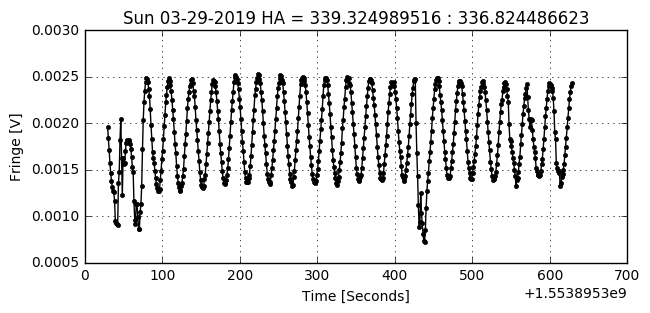

delay = 27.282827613 seconds, 0.0366530923474Hz
avg hour angle = -21.9252511176, baseline = 50.0000016
('ra = 7.93799858595', 'dec = 3.42583935764', 'lst = 29.8632497036', 'ha = -21.9252511176')
279
calculated f = 0.0366530923474 Hz = 27.282827613 seconds
measured f = 0.035 Hz = 28.5714285714 seconds
difference = 0.00165309234744 Hz  = -1.28860095839 seconds


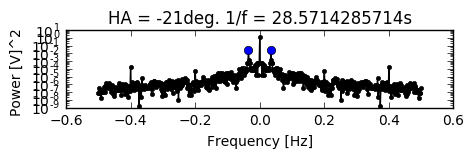

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 22:05:30.630>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 22:15:30.631>)
(331.8187164469641, 329.31818995418064)


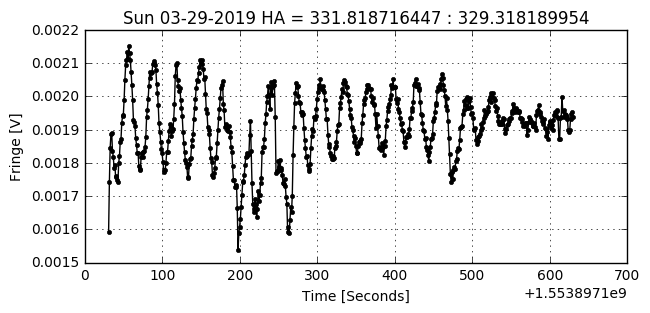

delay = 29.0601343192 seconds, 0.0344114032308Hz
avg hour angle = -29.4315774854, baseline = 50.0000016
('ra = 7.95697593849', 'dec = 3.43395707282', 'lst = 37.3885534239', 'ha = -29.4315774854')
319
calculated f = 0.0344114032308 Hz = 29.0601343192 seconds
measured f = 0.0316666666667 Hz = 31.5789473684 seconds
difference = 0.00274473656412 Hz  = -2.51881304919 seconds


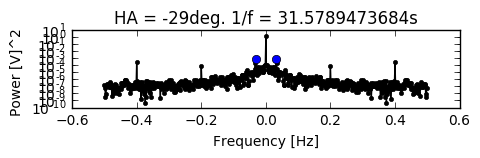

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 22:35:32.527>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 22:45:32.524>)
(324.3092416185085, 321.8087305938852)


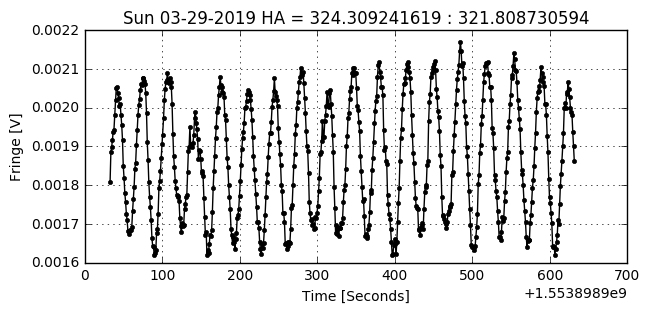

delay = 31.666931949 seconds, 0.0315786828231Hz
avg hour angle = -36.9410231176, baseline = 50.0000016
('ra = 7.97596130074', 'dec = 3.44207770033', 'lst = 44.9169844183', 'ha = -36.9410231176')
283
317
calculated f = 0.0315786828231 Hz = 31.666931949 seconds
measured f = 0.0283333333333 Hz = 35.2941176471 seconds
difference = 0.00324534948981 Hz  = -3.62718569804 seconds


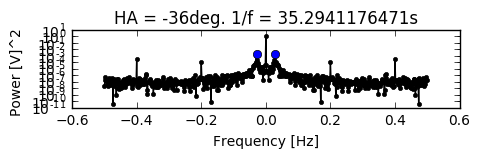

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 23:05:33.696>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 23:15:33.697>)
(316.8028012976623, 314.302272877483)


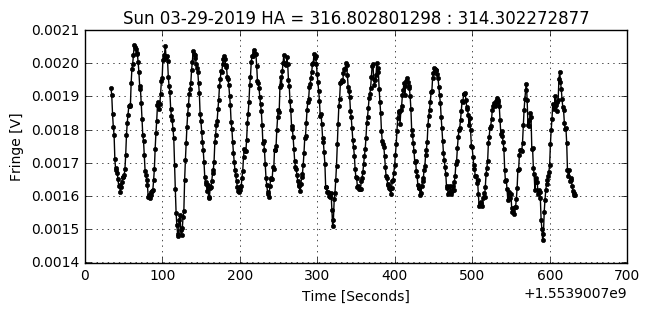

delay = 35.4537195323 seconds, 0.0282057852657Hz
avg hour angle = -44.4474652616, baseline = 50.0000016
('ra = 7.99493919386', 'dec = 3.45019461819', 'lst = 52.4424044555', 'ha = -44.4474652616')
315
calculated f = 0.0282057852657 Hz = 35.4537195323 seconds
measured f = 0.025 Hz = 40.0 seconds
difference = 0.00320578526571 Hz  = -4.54628046766 seconds


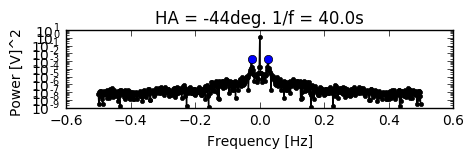

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-29 23:35:34.881>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-29 23:45:34.878>)
(309.2962935322154, 306.7957810836744)


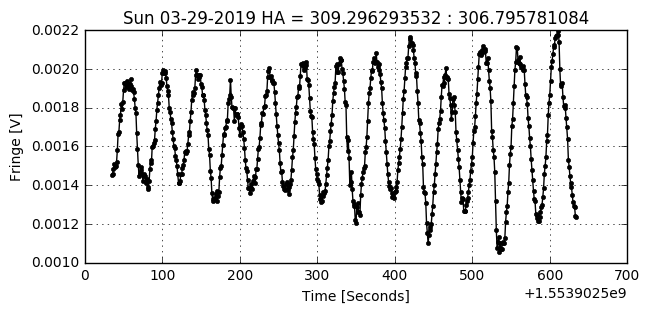

delay = 41.0686316929 seconds, 0.024349484236Hz
avg hour angle = -51.9539582505, baseline = 50.0000016
('ra = 8.01391734049', 'dec = 3.45831112851', 'lst = 59.967875591', 'ha = -51.9539582505')
287
calculated f = 0.024349484236 Hz = 41.0686316929 seconds
measured f = 0.0216666666667 Hz = 46.1538461538 seconds
difference = 0.00268281756934 Hz  = -5.08521446097 seconds


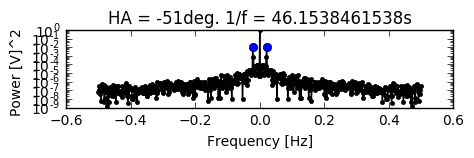

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-30 00:05:36.077>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-30 00:15:36.113>)
(301.78974028903536, 299.28906540989516)


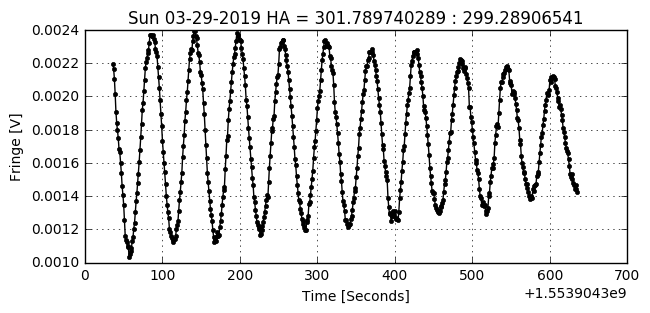

delay = 49.8113188702 seconds, 0.0200757583353Hz
avg hour angle = -59.4606985946, baseline = 50.0000016
('ra = 8.03289623813', 'dec = 3.46642744286', 'lst = 67.4935948327', 'ha = -59.4606985946')
290
calculated f = 0.0200757583353 Hz = 49.8113188702 seconds
measured f = 0.0166666666667 Hz = 60.0 seconds
difference = 0.00340909166862 Hz  = -10.1886811298 seconds


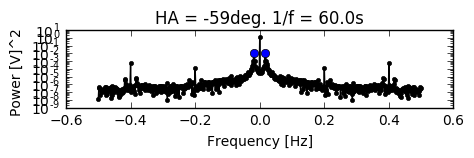

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-30 00:35:37.296>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-30 00:48:08.297>)
(294.2830916055019, 291.15326498793365)


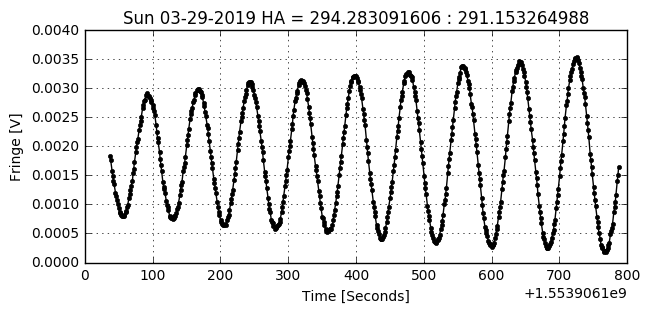

delay = 65.5440103831 seconds, 0.0152569242278Hz
avg hour angle = -67.2839038709, baseline = 50.0000016
('ra = 8.05267537193', 'dec = 3.4748854261', 'lst = 75.3365792428', 'ha = -67.2839038709')
293
calculated f = 0.0152569242278 Hz = 65.5440103831 seconds
measured f = 0.0116666666667 Hz = 85.7142857143 seconds
difference = 0.00359025756113 Hz  = -20.1702753312 seconds


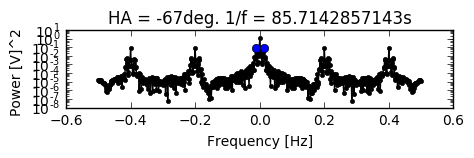

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-30 01:05:38.494>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-30 01:15:38.492>)
(286.7765294034149, 284.2760179244424)


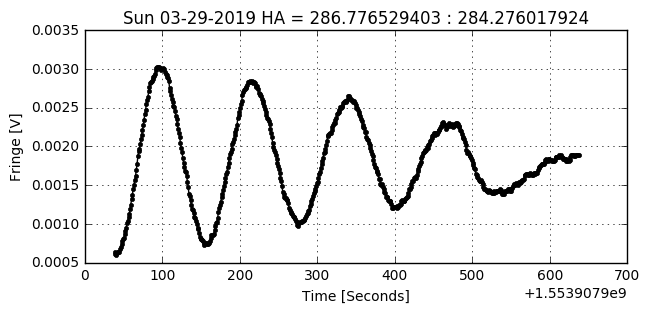

delay = 94.5572305013 seconds, 0.0105756058495Hz
avg hour angle = -74.4737747954, baseline = 50.0000016
('ra = 8.07085339051', 'dec = 3.4826582404', 'lst = 82.5446281859', 'ha = -74.4737747954')
295
calculated f = 0.0105756058495 Hz = 94.5572305013 seconds
measured f = 0.00833333333333 Hz = 120.0 seconds
difference = 0.00224227251614 Hz  = -25.4427694987 seconds


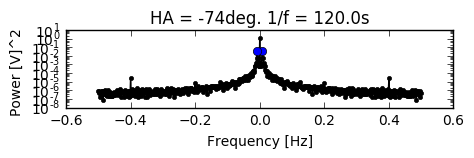

('UTC start time = ', <Time object: scale='utc' format='iso' value=2019-03-30 01:35:39.711>)
('UTC end time = ', <Time object: scale='utc' format='iso' value=2019-03-30 01:45:39.712>)
(279.2698910405621, 276.7693633409258)


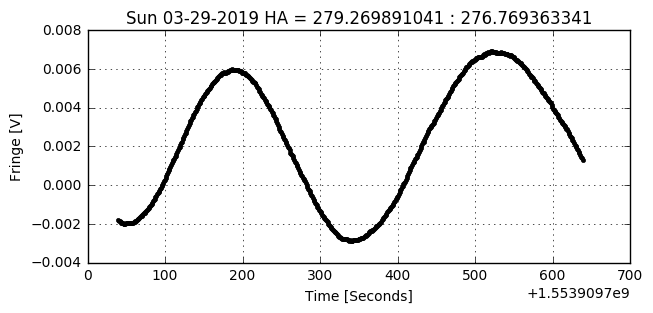

delay = 181.426627423 seconds, 0.00551187008327Hz
avg hour angle = -81.980374907, baseline = 50.0000016
('ra = 8.08983231471', 'dec = 3.49077300751', 'lst = 90.0702072217', 'ha = -81.980374907')
298
calculated f = 0.00551187008327 Hz = 181.426627423 seconds
measured f = 0.00333333333333 Hz = 300.0 seconds
difference = 0.00217853674994 Hz  = -118.573372577 seconds


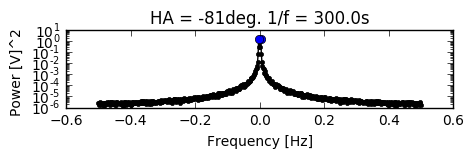

In [47]:
calculated = []
measured = []
ha_position = []
calc_seconds = []
measured_seconds = []

for i in range(len(sun_29_time)):
    start = 0
    end = 600
    avg_time = abs(end-start)/2 + start

    start_date = Time(timing.julian_date(sun_29_time[i][start]), format = 'jd')
    start_date.format = 'iso'
    print('UTC start time = ', start_date)

    end_date = Time(timing.julian_date(sun_29_time[i][end]), format = 'jd')
    end_date.format = 'iso'
    print('UTC end time = ', end_date)

    ra, dec = coord.sunpos(start_date)
    lst = 180* timing.lst(start_date)/np.pi
    start_ha = 360 - abs(ra-lst)

    ra, dec = coord.sunpos(end_date)
    lst = 180* timing.lst(end_date)/np.pi
    end_ha = 360 -  abs(ra-lst)
    print(start_ha, end_ha)

    plt.figure(figsize = (7, 3))
    plt.plot(sun_29_time[i][start:end], sun_29_volts[i][start:end], 'k.-')
    plt.title('Sun 03-29-2019 HA = ' + str(start_ha) + ' : ' + str(end_ha) )
    plt.xlabel('Time [Seconds]')
    plt.ylabel('Fringe [V]')
    plt.grid()
    plt.show()

    jd = timing.julian_date(sun_29_time[i][avg_time])
    ra, dec = coord.sunpos(jd)
    
    lst = 180* timing.lst(jd)/np.pi
    if lst > 91:
        ha =  360 + ra-lst
    if lst < 91:
        ha = ra-lst
    lam = 2.8 #cm  #beam size
    bx = 1524 #vary this ~50ft in cm
    w = 2*np.pi/ (24*60*60)#86164
    f = bx/lam * np.cos(np.deg2rad(dec)) * np.cos(np.deg2rad(ha)) * (2*np.pi / (60*24*60))

    print('delay = ' + str(1/f) + ' seconds, ' + str(f) + 'Hz')
    print('avg hour angle = ' +str(ha) + ', baseline = ' + str(bx * 0.0328084))
    print('ra = ' + str(ra), 'dec = ' + str(dec), 'lst = ' + str(lst), 'ha = ' + str(ha))
    
    #Fourier Transform

    frequency, voltage = dft.dft(sun_29_volts[i][start:end], sun_29_time[i][start:end])
    power = np.abs(voltage)**2

    
    y_2 = np.sort(power)[-2]
    #if (1/f) == 26.1690667186 or (1/f) == 67.9937685639 or (1/f) == 41.8817908463:
       

    for i in range(len(power)):
        if power[i] == y_2:
            x = i
            print(x)
        

    
    measured_f = abs(frequency[x]) 
    if (1/measured_f) < 10:
        y_2 = np.sort(power)[-10]
        for i in range(len(power)):
            if power[i] == y_2:
                x = i
                measured_f = abs(frequency[x]) 
    if ha < 53 and ha > 52:
        y_2 = np.sort(power)[-20]
        for i in range(len(power)):
            if power[i] == y_2:
                x = i
                measured_f = abs(frequency[x])
    #elif ha < -80:
    #    y_2 = np.sort(power)[-3]
    #    for i in range(len(power)):
    #        if power[i] == y_2:
    #            x = i
    #            measured_f = abs(frequency[x])
    measured.append(measured_f)
    calculated.append(f)
    
    measured_seconds.append(1/measured_f)
    calc_seconds.append(1/f)
    
    ha_position.append(ha)
    
    print('calculated f = '+ str(f) + ' Hz = ' +  str(1/f)+ ' seconds')
    print('measured f = ' + str(measured_f) + ' Hz = ' + str(1/measured_f)+ ' seconds')
    diff = abs(f - measured_f)
    print('difference = ' + str(diff) + ' Hz  = ' + str(1/f - 1/measured_f)+ ' seconds')

    plt.figure(figsize = (5, 1))
    plt.semilogy(frequency, power, 'k.-')
    plt.plot(measured_f, y_2, 'bo', label = str(measured_f) + ' Hz = ' + str(1/measured_f) + ' s')
    plt.plot(-measured_f, y_2, 'bo')
    plt.ylabel('Power [V]^2 ')
    plt.xlabel('Frequency [Hz]')
    plt.title('HA = '+ str(int(ha)) + 'deg. 1/f = ' + str(1/measured_f ) + 's')
    #plt.legend(prop={'size': 7}, title = 'Frequency')
    plt.show()

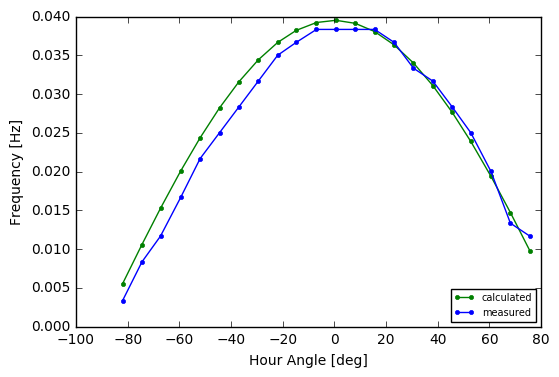

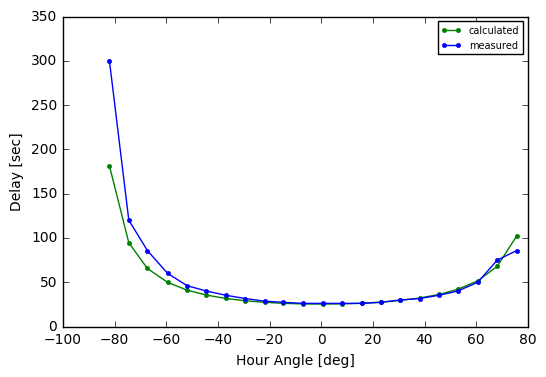

In [52]:
plt.plot(ha_position, calculated, 'g.-', label = 'calculated')
plt.plot(ha_position, measured, 'b.-', label = 'measured')
plt.legend(prop={'size': 7}, loc = 4)
plt.xlabel('Hour Angle [deg]')
plt.ylabel('Frequency [Hz]')
plt.show()

plt.plot(ha_position, calc_seconds, 'g.-', label = 'calculated')
plt.plot(ha_position, measured_seconds, 'b.-', label = 'measured')
plt.legend(prop={'size': 7}, loc = 1)
plt.xlabel('Hour Angle [deg]')
plt.ylabel('Delay [sec]')
plt.show()

In [5]:
def chi_square (data, model):
    data = np.array(data)
    model = np.array(model)
    sigmasq = np.var(model)
    chisq = np.sum(np.abs(model - data)**2/sigmasq)
    return chisq

In [ ]:
calculated = [0.00979019203914, 0.014707230105, 0.0193718348221, 0.0238767249392, 0.0276331720804, 0.0310840537453, ]
measured = [0.0116666666667, 0.0133333333333, 0.02, 0.025, 0.0283333333333,0.0316666666667 ]
ha = [75.6551153424, 68.1489215351,60.6432169476, 52.8245515304, 45.6267895014 , 38.1246706245]

In [6]:
b_x_p = np.linspace(1400,1600,num = 201)

chisq1 = []
for i in range (len(b_x_p)):
    chisq1.append(chi_square(calculated,measured))
plt.plot(b_x_p,chisq1)
plt.xlabel('$B_{ew}$ [cm]')
plt.ylabel('$\chi^2$')
plt.title("$\chi^2$ vs. $B_{ew}$")
plt.show()

NameError: name 'calculated' is not defined